# Introduction

This project aims to develop a predictive model to assist real estate agencies in efficiently pricing properties. In the real estate market, determining the fair selling price is a significant challenge, often relying on the experience of brokers or subjective comparisons, which may lead to inconsistent prices and misalignment with the market.

Using linear regression, a fundamental technique in Machine Learning, this project creates a model that relates specific property features, such as built area, number of bathrooms, and the presence of a garage, with their respective selling prices. Based on historical data of sold properties, the model can predict prices for new properties, thus facilitating more informed and efficient decision-making.

Throughout this project, we explore the relationships between the available variables and apply modeling and validation techniques to ensure prediction accuracy. The idea is that, with this model, real estate agencies can automate pricing processes, maximize margins, and offer more attractive and fair prices to their customers.

In [44]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm



In [45]:
dados = pd.read_csv("/content/Preços_de_casas.csv")
dados.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [46]:
# Checking for missing values and dataset structure

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [47]:
# Let's drop the ID column
dados = dados.drop(columns = "Id")
dados.head()

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,79.5224,1,79.3366,2,548,0,1027905.0
1,117.2398,0,0.0000,2,460,0,894795.0
2,85.4680,1,80.4514,2,608,0,1101855.0
3,89.2769,1,70.2324,1,642,0,690200.0
4,106.3705,1,97.8237,2,836,0,1232500.0


In [48]:
# Using the corr function to calculate the correlation matrix between the DataFrame columns
correlacao = dados.corr()

In [49]:
# The correlation of the other columns with the "sale price" column in order
correlacao['preco_de_venda'].sort_values(ascending=False)

,preco_de_venda
preco_de_venda,1.000000
capacidade_carros_garagem,0.640214
area_primeiro_andar,0.616557
quantidade_banheiros,0.563132
qualidade_da_cozinha_Excelente,0.496223
area_segundo_andar,0.305311
existe_segundo_andar,0.138541


We can get an idea of the columns with the highest correlation with house prices


Let's observe the relationship between the property price and the built area, as typically, when this factor is higher, the property price tends to be higher.


Text(0, 0.5, 'Sale Price')

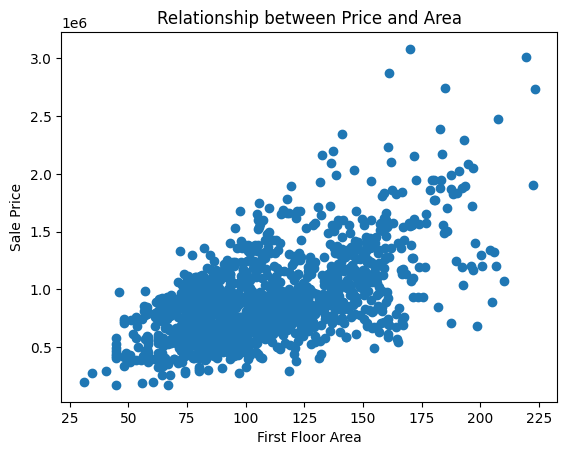

In [50]:
# Relationship between built area and property price
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.title("Relationship between Price and Area")
plt.xlabel("First Floor Area")
plt.ylabel("Sale Price")


We can observe a certain linearity: as the first floor area increases, the sale price tends to increase.








In [51]:
# Using Plotly Express with the OLS trendline, we can better observe the linear relationship between the First Floor Area and the Sale Price.
px.scatter(dados, x = "area_primeiro_andar", y = "preco_de_venda", trendline_color_override="red", trendline="ols")


We want to explain the house price based on its size, therefore we define:

- **Explanatory/Independent Variable:** First Floor Area
- **Response/Dependent Variable:** House Price


Now that we have our data organized and understand the variables involved, we will split the dataset into training and testing sets. The idea behind this split is simple: we use part of the data to train the model and the other part to test its effectiveness.

This helps us verify if the model can correctly predict the sale price of houses for data it has never seen before. In this way, we ensure that the model generalizes well and is not just memorizing the data.

We will also prepare the data to apply a Linear Regression model using the statsmodels library. This will allow us to fit a model that predicts the sale price of houses based on features like the first floor area.

In [52]:
# Defining Dependent (y) and Independent (X) Variables
y = dados['preco_de_venda']
x = dados.drop(columns = 'preco_de_venda')

- y: Represents the dependent or response variable, in this case, the sale price we want to predict.
- x: Contains the independent variables, meaning all the columns except for the preco_de_venda column, which will be used as predictors.

In [53]:
# Splitting the Data into Training and Testing Sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=222)

- We split the data so that 70% will be used to train the model and 30% to test it.

- We use random_state to ensure that the split is always the same.

In [54]:
# Creating a DataFrame to organize the training data
# Here, we are combining the independent variables (x_train) and the dependent variable (y_train) into a single DataFrame.
# This simplifies the application of the regression model, as statsmodels requires the variables to be together.
df_train = pd.DataFrame(data = x_train)
df_train['preco_de_venda'] = y_train

In [55]:
# Fitting the first model
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data = df_train).fit()

The model is trained based on the training data, meaning it learns the relationships between the independent variables (x_train) and the dependent variable (y_train) to then be able to make predictions.

In [56]:
# Visualizing the parameters
modelo_0.params

,0
Intercept,113234.069658
area_primeiro_andar,7128.147774


**Intercept:** If the first-floor area is 0, the base estimated value for the house will be R$ 152,909. This is the initial price, meaning the house's value regardless of its area.

**area_primeiro_andar:** On average, for each additional square meter of the first-floor area, the house price increases by R$ 6,793.

- The positive coefficient indicates a linear positive relationship. This means that an increase in the first-floor area directly and positively contributes to the house's selling price. The larger the first-floor area, the higher the estimated house value.

In [57]:
# the summary of our model
print(modelo_0.summary())
# P>|t| -- > when it is very low, it means that the area of the first floor has a significant effect in determining the house price

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     633.6
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          8.86e-109
Time:                        00:08:13   Log-Likelihood:                -14092.
No. Observations:                1006   AIC:                         2.819e+04
Df Residuals:                    1004   BIC:                         2.820e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.132e+05   3

**P>|t|:**

- This value indicates the p-value associated with the coefficient of the explanatory variable (first floor area).

- A low p-value (typically less than 0.05) means that the variable has a significant effect on determining the dependent variable, meaning that the first floor area truly influences the house price.

- A high p-value indicates that the variable may not have a relevant influence and, therefore, might not be essential to the model.

# How much of the variation in area explains house prices?
Let’s look at the R² metric (coefficient of determination).

- R² ranges from 0 to 1, where 1 indicates a perfect fit of the model to the data, meaning that all variations in the dependent variable are explained by the independent variables in the model. An R² of 0 means that the model explains none of the variability in the dependent variable.



In [58]:
modelo_0.rsquared

0.3868995044118789


We can estimate that approximately 39% of the variation in house prices is explained by the size of the first floor.

Therefore, 61% of the variations in house prices are not explained by the size of the first floor and can be attributed to other factors.

# Test Data
Now, let's check the model's performance with the test data. The idea is to see if the model can accurately predict house prices with new data and calculate the R² for the predictions.


In [59]:
y_predict = modelo_0.predict(x_test)

# x_test contains the features of the houses that the model hasn't seen yet.
# y_predict is an array with the model's predictions for house prices in the test set.

In [60]:
print("R²:", r2_score(y_test, y_predict))

R²: 0.3587345972812207


This value needs to be close to the training R² for the model to be considered consistent and reliable.

- Training R²: 0.39
- Test R²: 0.36

Since the values are close, we can conclude that the model performs well. This means that about 38% of the variation in house prices can be explained by the first-floor area.

# Analyzing Other Factors

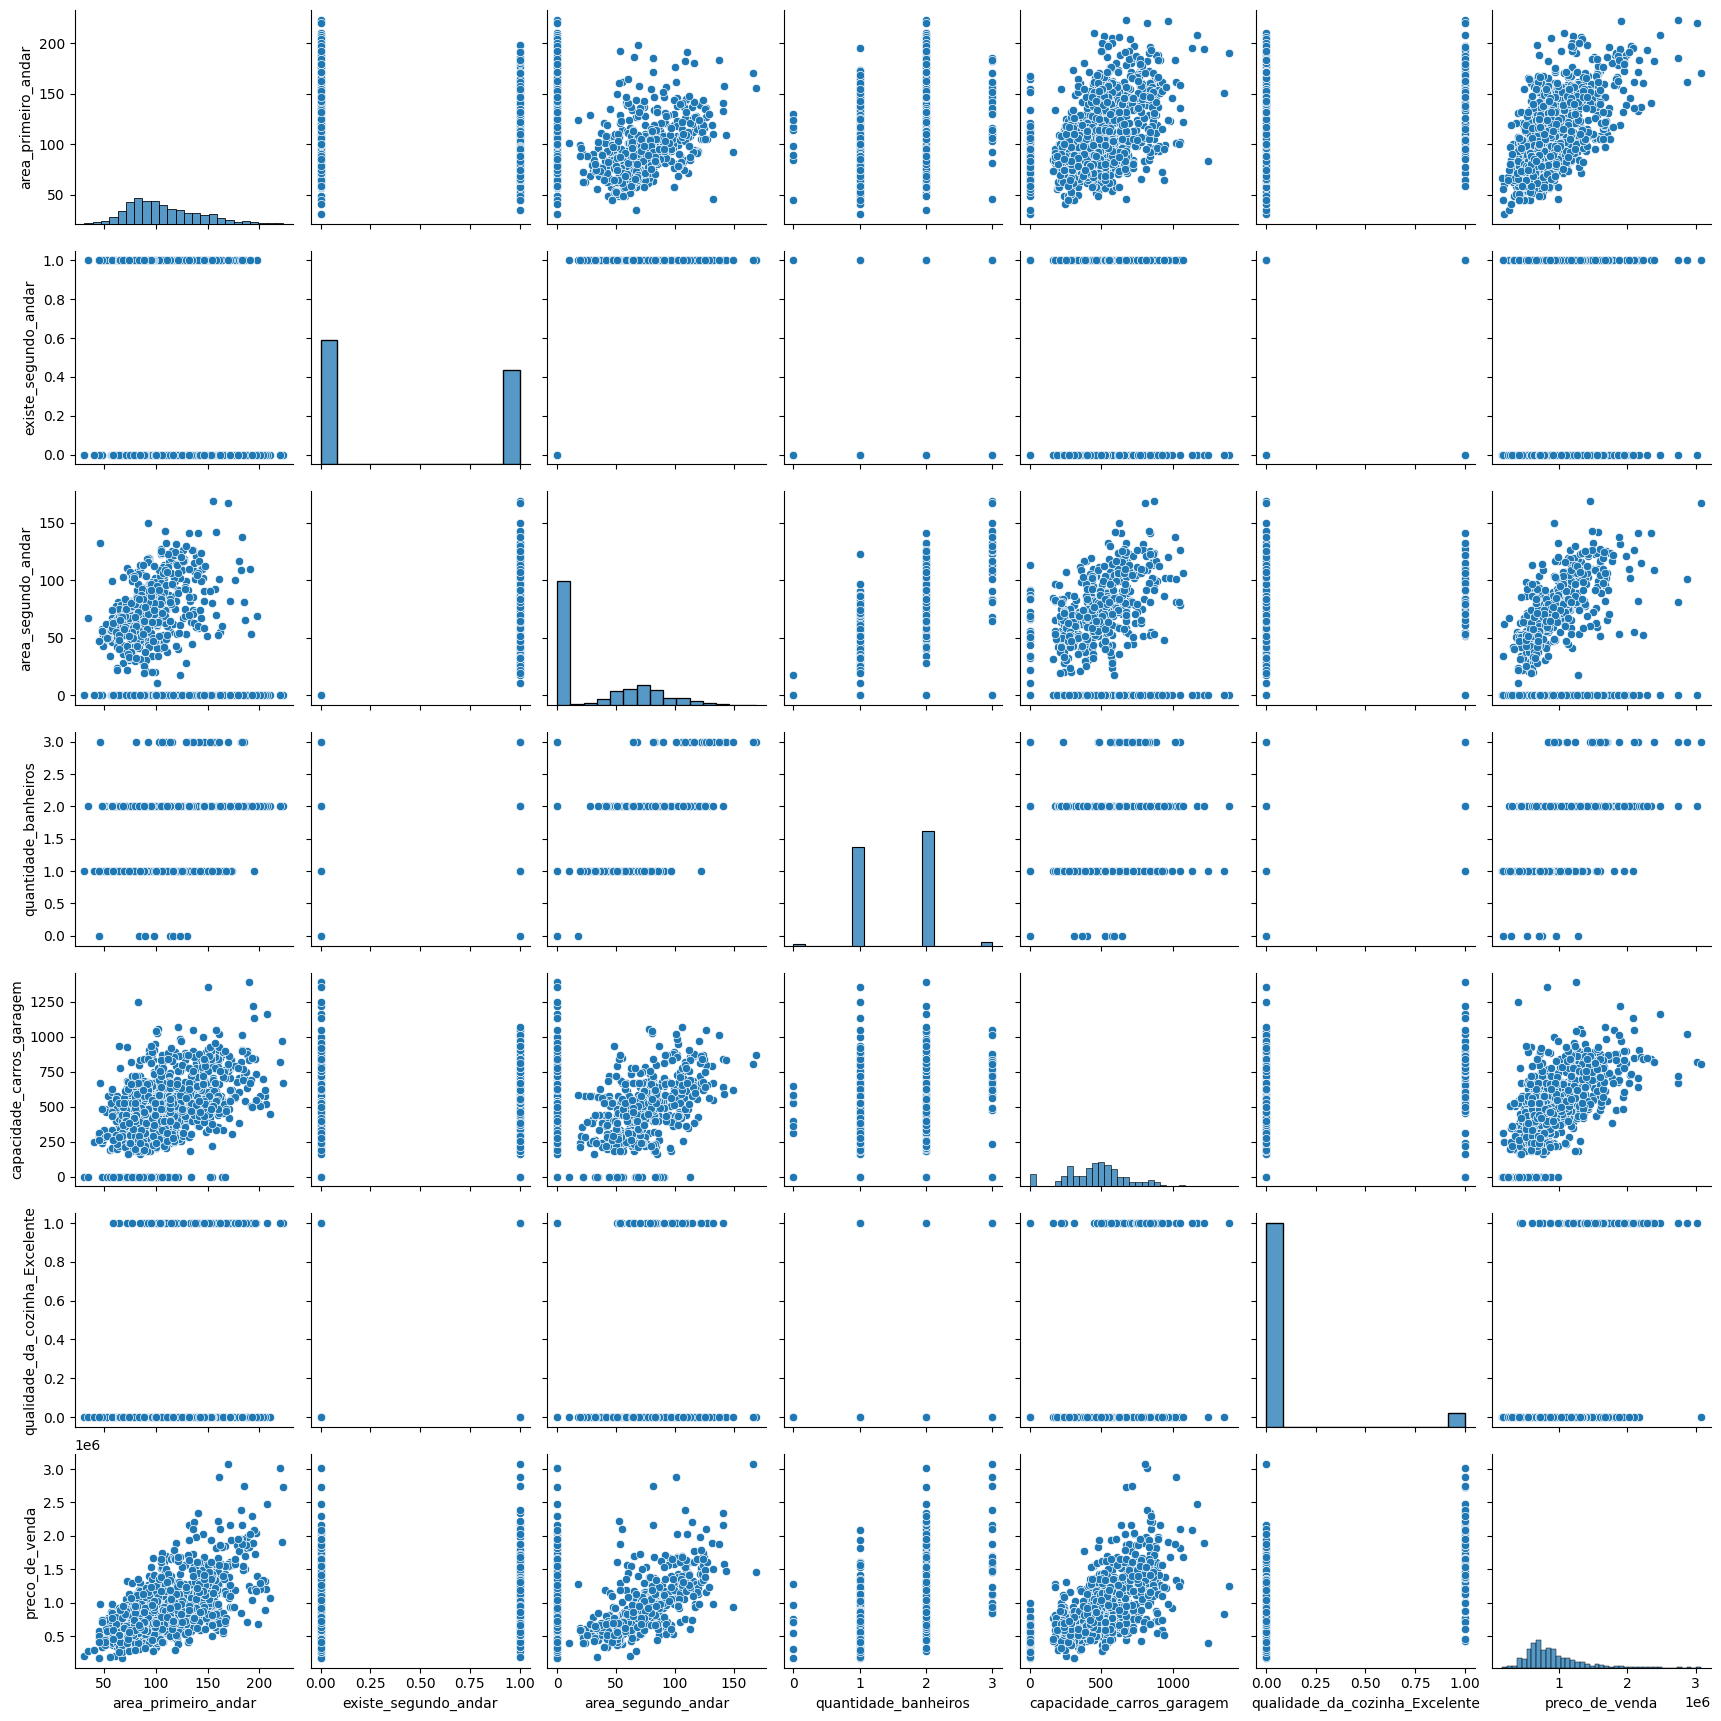

In [61]:
# Observing Other Features through Pairplot
sns.pairplot(dados)

In [62]:
dados.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

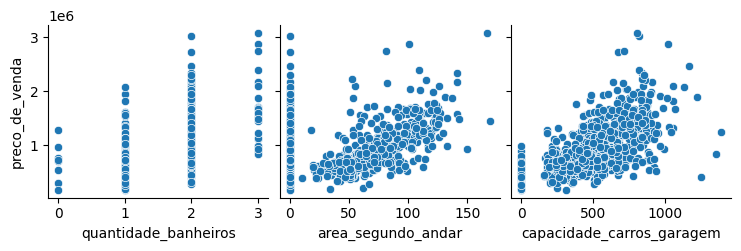

In [63]:
# Let's look only with y_vars='preco_de_venda'
sns.pairplot(dados, y_vars='preco_de_venda', x_vars=['quantidade_banheiros', 'area_segundo_andar', 'capacidade_carros_garagem'])

# Adding more factors to the model










- To make our linear regression model more robust and accurate, we will include more explanatory variables. So far, we have only considered the first-floor area, but the price of a house can be influenced by several other factors.

- We will check if the inclusion of these factors improves the model’s ability to predict the sale price of a property.

- For that, we will import the OLS function from the statsmodels.api library. This function enables the creation of a multiple linear regression model, which can handle several explanatory variables simultaneously.

In [64]:
# Adding a constant to estimate the intercept
x_train = sm.add_constant(x_train)

In [65]:
x_train.head()

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
810,1.0,193.6036,0,0.0000,2,1220,1
1074,1.0,129.1310,1,28.2416,2,576,0
1424,1.0,110.3652,0,0.0000,1,312,0
18,1.0,103.4906,0,0.0000,1,576,0
1010,1.0,152.9134,0,0.0000,2,800,0


In [66]:
x_train.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [67]:
# Viewing the correlation of the columns with the "sale price" column in order
correlacao['preco_de_venda'].sort_values(ascending=False)

,preco_de_venda
preco_de_venda,1.000000
capacidade_carros_garagem,0.640214
area_primeiro_andar,0.616557
quantidade_banheiros,0.563132
qualidade_da_cozinha_Excelente,0.496223
area_segundo_andar,0.305311
existe_segundo_andar,0.138541


In [68]:
# Model 1 ==> Model with all possible parameters
modelo_1 = sm.OLS(y_train,
                  x_train[['const', 'area_primeiro_andar', 'existe_segundo_andar',
                           'area_segundo_andar', 'quantidade_banheiros',
                           'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']]).fit()

In [69]:
# Model 2 ==> Model without the second floor area

modelo_2 = sm.OLS(y_train,
                  x_train[['const', 'area_primeiro_andar', 'existe_segundo_andar',
                          'quantidade_banheiros', 'capacidade_carros_garagem',
                          'qualidade_da_cozinha_Excelente']]).fit()

In [70]:
# Model 3 ==> Model without the second floor area and without garage information
modelo_3 = sm.OLS(y_train,
                  x_train[['const', 'area_primeiro_andar', 'existe_segundo_andar',
                          'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']]).fit()

Let's observe the R² of the models







In [71]:
print("R² of Model_0:", modelo_0.rsquared)
print("R² of Model_1:", modelo_1.rsquared)
print("R² of Model_2:", modelo_2.rsquared)
print("R² of Model_3:", modelo_3.rsquared)


R² of Model_0: 0.3868995044118789
R² of Model_1: 0.7355255621676181
R² of Model_2: 0.6990191283002525
R² of Model_3: 0.6382719657948573


The model with the highest R² is Model 1, followed by Models 2, 3, and finally Model 0. However, some variables were removed in certain models, indicating that the R² values may be linked to the number of factors included in the model.

In [72]:
# How many parameters are in the model
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))


2
7
6
5


Indeed, we observe that the more factors included in the model, the higher the R² value.

With this in mind, let's analyze the summary of each model to determine which one is the most suitable.

In [73]:
# Summary of Model 1
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     463.1
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          2.06e-284
Time:                        00:08:31   Log-Likelihood:                -13669.
No. Observations:                1006   AIC:                         2.735e+04
Df Residuals:                     999   BIC:                         2.739e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [74]:
# Summary of Model 2
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     464.5
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          9.19e-258
Time:                        00:08:31   Log-Likelihood:                -13734.
No. Observations:                1006   AIC:                         2.748e+04
Df Residuals:                    1000   BIC:                         2.751e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [75]:
# Summary of Model 3
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     441.6
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          2.99e-219
Time:                        00:08:31   Log-Likelihood:                -13827.
No. Observations:                1006   AIC:                         2.766e+04
Df Residuals:                    1001   BIC:                         2.769e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# Conclusion on Model Summaries

**Multicollinearity in Models 1 and 2:**
Models 1 and 2 showed signs of multicollinearity. Multicollinearity occurs when two or more independent variables are highly correlated, making it difficult for the model to isolate the individual effect of each variable on the dependent variable.

In this case, we observe that the "saturated model" (Model 1) includes two variables related to the second floor:

- "existe_segundo_andar"
- "area_segundo_andar"

In Model 1, the coefficient for the "existe_segundo_andar" variable is negative. However, when we remove the "area_segundo_andar" variable in Model 2, the coefficient for "existe_segundo_andar" becomes positive. This indicates a confounding effect: both variables are capturing the same phenomenon (the presence and size of the second floor), resulting in the inversion of coefficient signs when one of the variables is removed.

**Model 3 without Multicollinearity:**
Model 3, which excludes both "area_segundo_andar" and "capacidade_carros_garagem," does not show this inversion of signs. Additionally, this model is more consistent in interpreting coefficients and presents no signs of multicollinearity. Although Model 3 has a lower R² compared to the other two models, its simplicity and consistency in coefficients make it a more reliable choice.

**We will choose Model 3 because:**

- It does not present sign changes in coefficients among correlated variables.
- It does not present multicollinearity, ensuring that each variable independently explains its contribution to the house price.
- It has low p>|t| values, indicating that the variables are statistically significant to the model.

In [76]:
modelo_3.params

,0
const,-140372.651706
area_primeiro_andar,6098.776320
existe_segundo_andar,204784.775524
quantidade_banheiros,160598.663803
qualidade_da_cozinha_Excelente,443820.305045



When we run the command modelo_3.params, we obtain the estimated coefficients for each explanatory variable in the model. These coefficients indicate how the house price is affected by each variable, while keeping all other variables constant.

Based on the obtained coefficients, we can conclude that:

- First-floor area: For every 1 m² increase in the first-floor area, the house price increases by approximately R$ 6,119.65.

- Presence of a second floor: If the house has a second floor, the total value increases by R$ 221,306.96.

- Number of bathrooms: Adding one more bathroom increases the house price by R$ 149,036.28.

- Kitchen quality: If the kitchen is classified as "excellent," the house price increases by R$ 444,391.23.

These results provide valuable insights for developing more effective strategies for renovations or improvements in a property. For instance, when comparing the cost-benefit between building a second floor and upgrading the kitchen to "excellent" quality, we observe that the kitchen renovation yields a higher return in terms of property value appreciation. Therefore, if both investments have similar costs, improving the kitchen would likely be the more advantageous decision.


# Model Evaluation with Test Data







In [77]:
# Adding a constant to x_test
x_test = sm.add_constant(x_test)

In [78]:
# Predicting with model 3
predict_3 = modelo_3.predict(x_test[['const', 'area_primeiro_andar', 'existe_segundo_andar', 'quantidade_banheiros',  'qualidade_da_cozinha_Excelente']])

If the R² values for both training and testing are close, it indicates that the model generalizes well to new data and is not overfitting to the training set.

In [79]:
# What is the R² of the prediction?
print("R² da previsão:", modelo_3.rsquared)

R² da previsão: 0.6382719657948573


In [80]:
# What is the R² of the test?
print("R² do treino:", r2_score(y_test, predict_3))

R² do treino: 0.6758582382542069


When comparing the R² of the training and testing datasets, we observe that both values are very close. The R² for the training data was 0.6511, while for the testing data, it was 0.6432.

This proximity demonstrates that the model has good generalization ability, meaning it can consistently explain the variation in house prices both in the data used for training and in new, unseen data.

# Pricing a Set of Houses








In [81]:
# Dataset containing multiple houses
novas_casas = pd.read_csv("/content/Novas_casas.csv", sep = ";")

In [82]:
novas_casas.head()

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [83]:
novas_casas = novas_casas.drop(columns = "Casa")

In [84]:
# Adding the constant
novas_casas = sm.add_constant(novas_casas)

In [85]:
# Using Model_3 to predict house prices
modelo_3.predict(novas_casas)

,0
0,1.744246e+06
1,1.883023e+06
2,1.561283e+06
3,2.209784e+06
4,1.600449e+06
5,1.239438e+06
6,1.378215e+06
7,1.544377e+06
8,9.736656e+05
9,1.643988e+06


In this final part of the project, we used the trained model to predict the sale price of new properties based on the provided features. The predict() function applied the coefficients from the trained model to calculate the expected value of each property, ensuring a prediction based on historical data and patterns identified by the model.

This approach can streamline the pricing process for a real estate agency. Instead of relying solely on the subjective experience of agents or manual comparisons with similar properties, this model offers a more objective and consistent estimate.